# 1. KOSPI Buy & Hold

In [1]:
import pandas as pd
import numpy as np

# Finance Library import
from Library import FinanceLibrary as fl

##### csv 파일 읽어오기

In [2]:
df_kospi = pd.read_csv("..\\Data\\KOSPI_Daily_1980data.csv", encoding="utf-8")

##### KOSPI 주간, 월간데이터 만들기

In [3]:
df_kospi["Date"] = pd.to_datetime(df_kospi["Date"])  # Converting date to pandas datetime format
df_kospi["Year"] = df_kospi["Date"].dt.year  # Getting year number
df_kospi["Month"] = df_kospi["Date"].dt.month  # Getting month number
df_kospi["Week_Number"] = df_kospi["Date"].dt.week  # Getting week number
df_kospi["WeekDay"] = df_kospi["Date"].dt.weekday
df_kospi.index = pd.to_datetime(df_kospi["Date"])
# 주간, 월간 Data만들기
df_kospi_week = df_kospi.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_kospi_week = df_kospi_week.reset_index()
df_kospi_week.index = pd.to_datetime(df_kospi_week["Date"])
df_kospi_month = df_kospi.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_kospi_month = df_kospi_month.reset_index()
df_kospi_month.index = pd.to_datetime(df_kospi_month["Date"])

In [4]:
KOSPI_daily = df_kospi["Close"]/df_kospi["Close"][0]
KOSPI_daily = KOSPI_daily.sort_index()
KOSPI_week = df_kospi_week["Close"]/df_kospi_week["Close"][0]
KOSPI_week = KOSPI_week.sort_index()
KOSPI_month = df_kospi_month["Close"]/df_kospi_month["Close"][0]
KOSPI_month = KOSPI_month.sort_index()

##### 포트폴이오 평가하기

In [5]:
daily = fl.Portfolio(KOSPI_daily,"daily")
weekly = fl.Portfolio(KOSPI_week,"weekly")
monthly = fl.Portfolio(KOSPI_month,"monthly")
portfolio = pd.concat([daily,weekly,monthly], axis=1)
portfolio.T

,Initial Balnce,Final Balance,CAGR,Std,Max.Drawdown,Sharpe Ratio
daily,1.0,21.242800,7.9395,6.774715,-75.4116,0.027213
weekly,1.0,21.210984,7.9354,6.841269,-73.4633,0.061100
monthly,1.0,20.061196,7.7851,6.514851,-73.0577,0.121732


### Monthly & Max MDD 그래프

##### 일 데이타

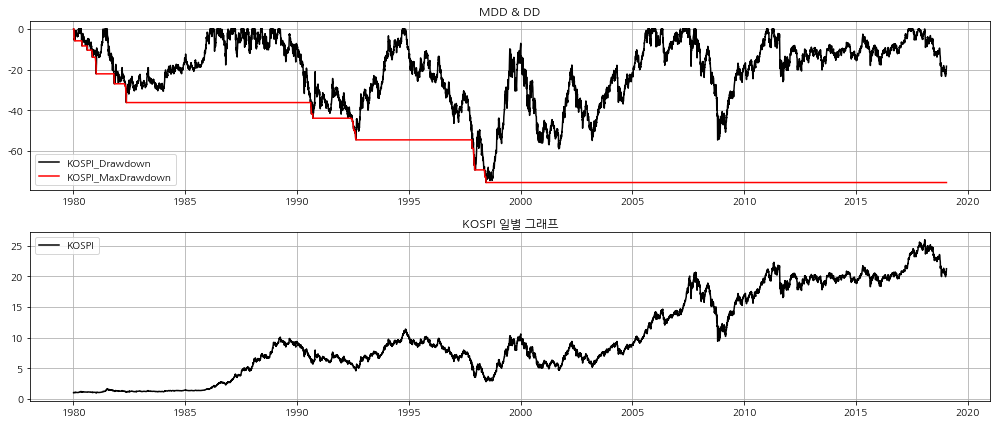

In [6]:
import matplotlib.pyplot as plt
#한글폰트사용하기
from matplotlib import rc, font_manager
import matplotlib
rc("font", family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

DD, MDD = fl.MDD(KOSPI_daily)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.set_title("MDD & DD")
ax1.plot(DD,color="Black",label="KOSPI_Drawdown");
ax1.plot(MDD,color="Red", label="KOSPI_MaxDrawdown");
ax1.grid()
ax1.legend()

ax2.set_title("KOSPI 일별 그래프")
ax2.plot(KOSPI_daily,color="Black",label="KOSPI");
ax2.grid()
ax2.legend()
# 차트끼리 충돌을 방지합니다.
plt.tight_layout()


##### 주간 데이타

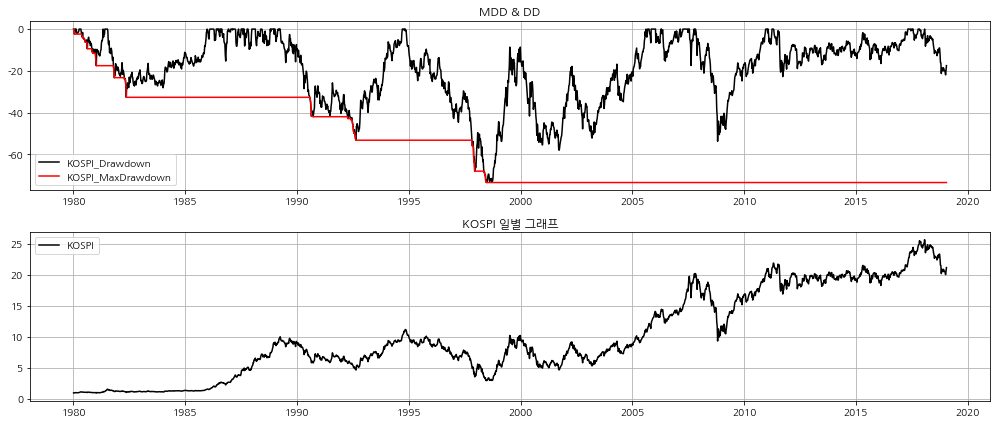

In [7]:
import matplotlib.pyplot as plt
#한글폰트사용하기
from matplotlib import rc, font_manager
import matplotlib
rc("font", family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

DD, MDD = fl.MDD(KOSPI_week)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.set_title("MDD & DD")
ax1.plot(DD,color="Black",label="KOSPI_Drawdown");
ax1.plot(MDD,color="Red", label="KOSPI_MaxDrawdown");
ax1.grid()
ax1.legend()

ax2.set_title("KOSPI 일별 그래프")
ax2.plot(KOSPI_week,color="Black",label="KOSPI");
ax2.grid()
ax2.legend()
# 차트끼리 충돌을 방지합니다.
plt.tight_layout()

##### 월간 데이타

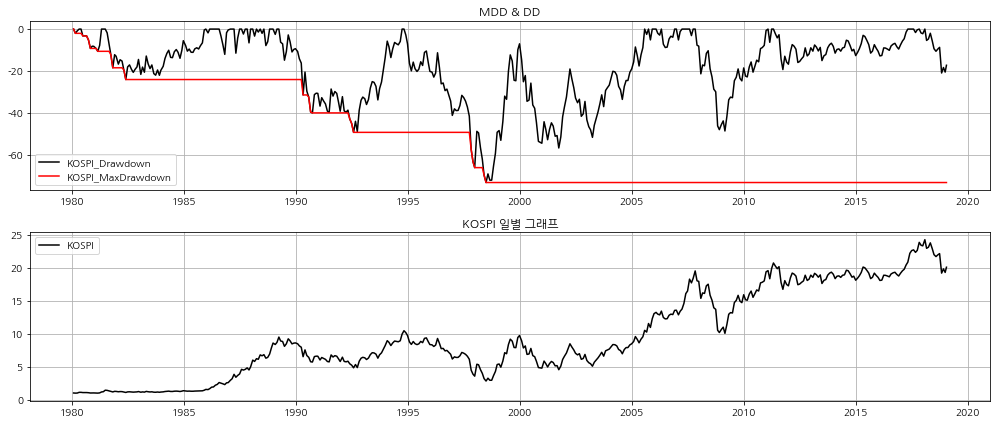

In [8]:
import matplotlib.pyplot as plt
#한글폰트사용하기
from matplotlib import rc, font_manager
import matplotlib
rc("font", family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

DD, MDD = fl.MDD(KOSPI_month)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.set_title("MDD & DD")
ax1.plot(DD,color="Black",label="KOSPI_Drawdown");
ax1.plot(MDD,color="Red", label="KOSPI_MaxDrawdown");
ax1.grid()
ax1.legend()

ax2.set_title("KOSPI 일별 그래프")
ax2.plot(KOSPI_month,color="Black",label="KOSPI");
ax2.grid()
ax2.legend()
# 차트끼리 충돌을 방지합니다.
plt.tight_layout()